#predicting the sell price using machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
print(np.random.seed(42))

None


In [3]:
#import train and validation data set

df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
#check the null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

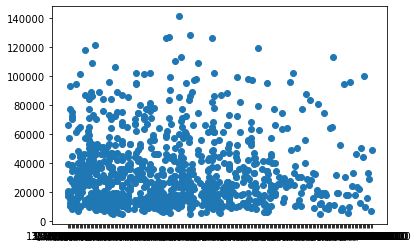

In [6]:
fig,ax= plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

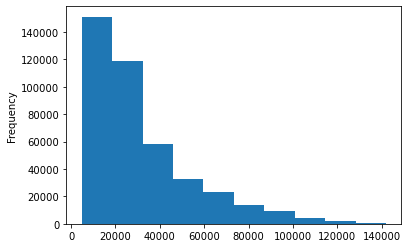

In [8]:
df.SalePrice.plot.hist()

#Parsing dates

In [9]:
#import data again with time parse dates

df=pd.read_csv("data/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])

In [10]:
df.saledate.dtype


dtype('<M8[ns]')

In [11]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

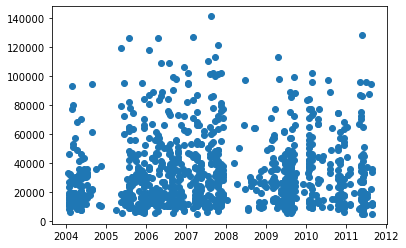

In [12]:
fig,ax=plt.subplots()

ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])


In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head().T


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [16]:
#sort datafarame by saledate
#when working with time seires data it is good to sort them by date

In [17]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#Make a copy of the original dataframe

In [19]:
#make a copy
df_temp=df.copy()

In [20]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_temp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [22]:
#add datatime parameters for 'saledate ' column

In [23]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [24]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [25]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [26]:
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayOfTheWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayOfTheYear"]=df_temp.saledate.dt.dayofyear

In [27]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [28]:
#we can now drop the saledate
df_temp.drop("saledate",axis=1,inplace=True)

In [29]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [30]:
df_temp.state.value_counts()


Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

#modeling

In [47]:

#build the ml model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)

model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])


ValueError: could not convert string to float: 'Low'

In [48]:
df_temp["UsageBand"].dtype

dtype('O')

In [49]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [50]:
#convert string to categories
#convert all string to numbers from using pandas

In [51]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleDay,saleDayOfTheWeek,saleDayOfTheYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,31


In [52]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [53]:
#find the columns which conatains strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
df_temp.items()

<generator object DataFrame.items at 0x000002A8AF4E8820>

In [55]:
random_dict ={"key 1":"hello",
             "key2" :"world !"}

for key,value in random_dict.items():
    print(f"this is a key :{key}",
         f"this is a value :{value}")
    

this is a key :key 1 this is a value :hello
this is a key :key2 this is a value :world !


In [56]:
#this will turn sting values into categorial values
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] =content.astype("category").cat.as_ordered()

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [58]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [59]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [60]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [61]:
#we can  acess the strinf from nmbers
#check missing data

df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [62]:
#save the new data into new csv file


In [63]:
#exportcurrent data frame
df_temp.to_csv("data/train_temp.csv",
              index=False)

In [64]:
#import preprosecessed data
df_temp=pd.read_csv('data/train_temp.csv',
                   low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [66]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

filling the missing values


In [67]:
#fill numeric missing values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleDayOfTheWeek
saleDayOfTheYear


In [68]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [69]:
#CHECK FOR THE MISSING VALUES IN NUMERIC VALUES
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [70]:
#fill the numeric values with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column if the data missing or not
            df_temp[label+"_is_missing"] =pd.isnull(content)
            
            #fill missing numeric values with median
            
            df_temp[label] =content.fillna(content.median())

In [71]:
#demonstarte how median is more robust than mean

hundreds =np.full((1000,),100)
hundreds_billion =np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundreds_billion),np.median(hundreds),np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [72]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [73]:
df_temp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleDay,saleDayOfTheWeek,saleDayOfTheYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,Straight,None or Unspecified,NaN,NaN,1989,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,NaN,Standard,Conventional,1989,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,Straight,None or Unspecified,NaN,NaN,1989,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,NaN,Standard,Conventional,1989,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,PAT,Lever,NaN,NaN,1989,31,1,31,False,True


In [74]:
#check to missing values after updating

df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [75]:
#chek the misisng values
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [76]:
df_temp.auctioneerID.median()

2.0

In [77]:
df_temp.isna().sum()



SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

 #filling and turning categorical varibales
    

In [78]:
#check for the columns with aren't numeric

for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [79]:
pd.Categorical(df_temp["state"])


[Texas, Florida, Florida, Florida, Florida, ..., California, California, California, California, California]
Length: 412698
Categories (53, object): [Alabama, Alaska, Arizona, Arkansas, ..., Washington DC, West Virginia, Wisconsin, Wyoming]

In [80]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=False)

In [81]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [82]:
#turn categorical into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column to indicate whether sample had missing values
        df_temp[label+"_is_missing"] =pd.isnull(content)
        
        #turn categories into numbers and add+1
        df_temp[label] =pd.Categorical(content).codes+1

In [83]:
pd.Categorical(df_temp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [84]:
pd.Categorical(df_temp["UsageBand"]).codes+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [85]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(9), int8(40)
memory usage: 74.8 MB


In [86]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [87]:
df_temp.isna().sum()[:20]


SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [88]:
# %%time
# #Instatinatiate model 
# model =RandomForestRegressor(n_jobs=-1,
#                             random_state=42)

# #fit the model
# model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])




In [89]:
len(df_temp)

412698

In [90]:
#score model

model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#splitting data into train and valid data


In [91]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [92]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [93]:
#split data into trainig and validatation

df_val =df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

len(df_val) ,len(df_train)

(11573, 401125)

In [94]:
#split the data into X and y
X_train,y_train =df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice



X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [95]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

#build the evaluation function


In [96]:
#create evautaion function (the competiotn uses root mean squre error)

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean sqread log error between predictions and true labels
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


#create function to evalutae on few different moels

def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    
    scores={"Trainning MAE" :mean_absolute_error(y_train,train_preds),
           "Valid MAE" :mean_absolute_error(y_valid,val_preds),
           "Trainning RMSLE" :rmsle(y_train,train_preds),
           "Valid RMSLE" :rmsle(y_valid,val_preds),
           "Trainning R^2" :r2_score(y_train,train_preds),
           "Valid R^2" :r2_score(y_valid,val_preds)
                                 }
    
    return scores

testing the Model

In [97]:
# %%time
# model=RandomForestRegressor(n_jobs=-1,
#                            random_state=42)

# model.fit(X_train,y_train)

In [98]:
#model.fit(X_train[:10000],y_train[:10000])

In [102]:
#change max samples value]

model =RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)



In [103]:
X_train.shape[0]

401125

In [105]:
%%time
#cutting down the number of samples each estimatior can see the samples
model.fit(X_train,y_train)


Wall time: 11.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [43]:
show_scores(model)





NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

HyperPrameter Tuning with Randomized cv

In [106]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
#different random forest regressor hyper parametrss 

rf_grid ={"n_estimators" :np.arange(10,100,10),
         "max_depth" :[None,3,5,10],
         "min_samples_split" :np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
        "max_features" :[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}

#instainate randomized serch cv model 

rs_model =RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)

#fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.4s finished


Wall time: 1min


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [107]:
rs_model.best_params_


{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [108]:
#Evaluate the randomized search model

show_scores(rs_model)

{'Trainning MAE': 13362.232590988591,
 'Valid MAE': 15325.313524681356,
 'Trainning RMSLE': 0.5643240836802809,
 'Valid RMSLE': 0.5702966631403394,
 'Trainning R^2': 0.3496236092028293,
 'Valid R^2': 0.34166010207518116}

#train the model with the best hyper parameters

found these after 100 iterations

In [109]:
%%time 

#most ideal hyper parameters 

ideal_model =RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

#fit the ideal model

ideal_model.fit(X_train,y_train)

Wall time: 1min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [110]:
#scores for ideal model(Trained for all data)
show_scores(ideal_model)

{'Trainning MAE': 2971.336691945768,
 'Valid MAE': 5938.317414225988,
 'Trainning RMSLE': 0.14512874467944326,
 'Valid RMSLE': 0.24480583859604726,
 'Trainning R^2': 0.9583989934360831,
 'Valid R^2': 0.8817652286491364}

Make predictions on test data

In [163]:
#import test data

df_test =pd.read_csv("data/Test.csv",low_memory=False,
                     parse_dates=["saledate"])
                                  
df_test.head()
                                  

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [164]:
# #make predictions on the test dataset
# test_preds =ideal_model.predict(df_test)


In [165]:
df_test.isna().sum()


SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [167]:
#preproseccing the data(get the test data as the same format)

def preprocess_data(df):
    """
    Performs transformations on df and returns transfirmed df
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfTheWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfTheYear"]=df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    #fill the numeric rows with the median
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary column if the data missing or not
                df[label+"_is_missing"] =pd.isnull(content)
            
                #fill missing numeric values with median
            
                df[label] =content.fillna(content.median())
    
    #filled the categorical numerical data and turn categories in to numrerical cartegories
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] =pd.isnull(content)
            df[label] =pd.Categorical(content).codes+1
        
    
    return df
    
    
    

In [168]:
#process test data
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [169]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [170]:
#make predictions on updated test data

test_preds=ideal_model.predict(df_test)

In [153]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [154]:
#find how the columns differe using sets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [155]:
#Manually adjust df_test to have auctioner ID 
df_test["auctioneerID_is_missing"] =False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [156]:
#make predictions on the test data

test_preds=ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 101 and input n_features is 102 

In [158]:
df_test.drop["saleMonth",axis=1]

SyntaxError: invalid syntax (<ipython-input-158-d18c204e46ff>, line 1)

In [160]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [161]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [171]:
test_preds

array([18276.66256422, 17968.86982133, 49967.08621286, ...,
       13582.71554834, 19340.64180133, 28630.68104264])

In [172]:
len(test_preds)

12457

In [173]:
#format predictions into the same format
df_preds =pd.DataFrame()
df_preds["SalesID"] =df_test["SalesID"]
df_preds["SalesPrice"] =test_preds

df_preds

,SalesID,SalesPrice
0,1227829,18276.662564
1,1227844,17968.869821
2,1227847,49967.086213
3,1227848,63828.751324
4,1227863,55668.811313
...,...,...
12452,6643171,44050.418107
12453,6643173,13710.289031
12454,6643184,13582.715548
12455,6643186,19340.641801


In [174]:
#export prediction data to csv
df_preds.to_csv("data/bluebook-for-buldozer-predictions.csv",index=False)

#fetaure Importance -seeks to figure out which attributes important when predicting


In [176]:
#find the feature importnces of the ideal model
ideal_model.feature_importances_

array([3.37373105e-02, 2.13268833e-02, 4.57785214e-02, 1.70477612e-03,
       3.45340307e-03, 1.91710861e-01, 3.44750714e-03, 1.00722211e-03,
       4.29849872e-02, 4.70955166e-02, 7.42469664e-02, 4.95674560e-03,
       2.18187456e-02, 1.48391591e-01, 4.19973981e-02, 6.23866450e-03,
       3.71471538e-03, 1.20243344e-03, 3.20614758e-03, 6.19183938e-02,
       7.64080404e-04, 6.44841113e-05, 9.68417024e-04, 1.68393131e-04,
       1.34321230e-03, 3.75228282e-05, 4.91785112e-04, 6.30437528e-03,
       2.75412050e-03, 4.12142045e-03, 2.94898398e-03, 2.56261584e-03,
       3.43319733e-03, 9.49104511e-04, 4.06883407e-04, 1.46601151e-02,
       8.21622104e-04, 1.59875755e-02, 1.29431540e-03, 2.27143738e-03,
       1.24496957e-03, 9.40627125e-04, 1.20229034e-03, 6.08854117e-04,
       4.46559459e-04, 4.46945119e-04, 1.06970389e-03, 1.90491642e-03,
       1.48918100e-03, 2.80023422e-04, 3.74301241e-04, 7.27404134e-02,
       5.96538831e-03, 3.07041933e-03, 1.16780935e-02, 2.50040321e-04,
      

In [177]:
len(ideal_model.feature_importances_)

101

In [190]:
#helper fucntion to polotting feature imoprtnce

def plot_features(columns,importances,n=20):
    df =(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
        .sort_values("feature_importances",ascending=False)
        .reset_index(drop=True))
    
    #plot the daatframe
    fig,ax =plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    
    

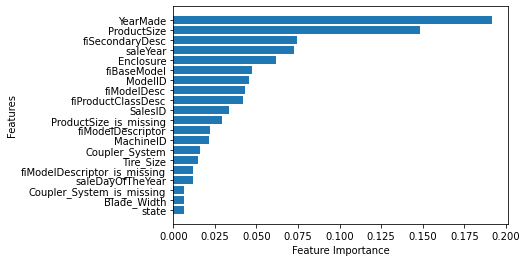

In [191]:
plot_features(X_train.columns,ideal_model.feature_importances_)
